   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  
<class 'pandas.core.

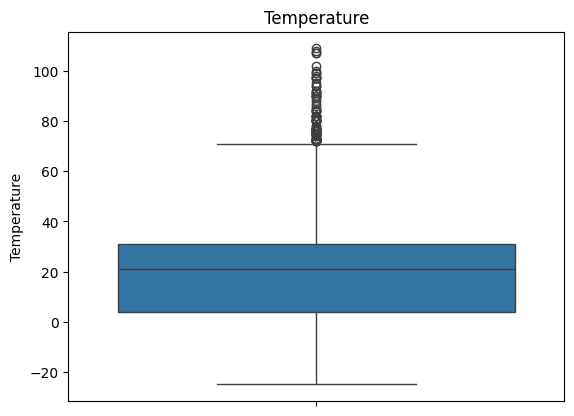

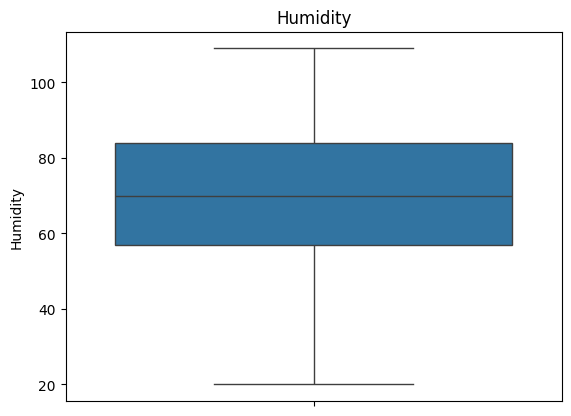

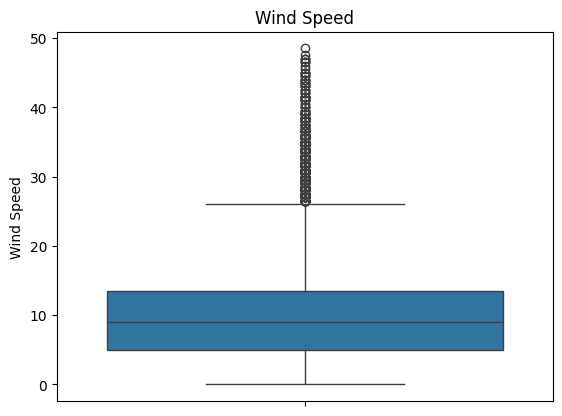

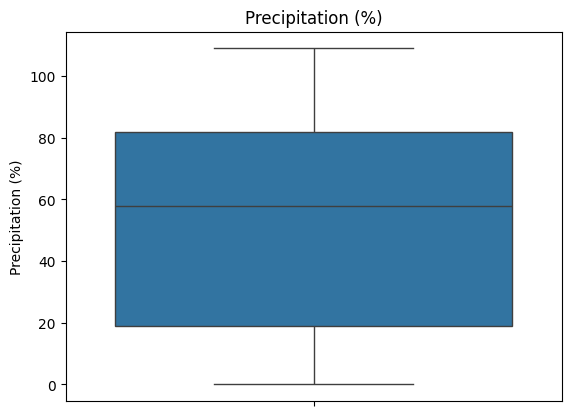

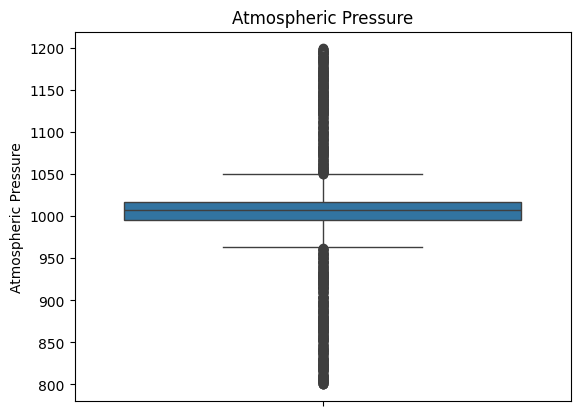

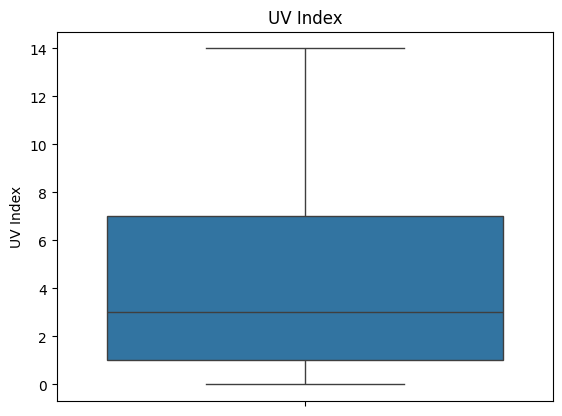

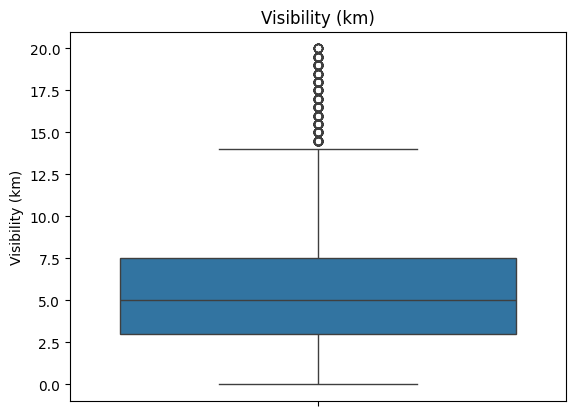

The Rainy weather temperature ranges from -19.0 to 70.0
The Cloudy weather temperature ranges from -18.0 to 71.0
The Sunny weather temperature ranges from -16.0 to 71.0
The Snowy weather temperature ranges from -24.0 to 49.0
---------------------------------------------------------------
The Rainy weather humidity ranges from 21 to 109
The Cloudy weather humidity ranges from 20 to 109
The Sunny weather humidity ranges from 20 to 109
The Snowy weather humidity ranges from 20 to 109
---------------------------------------------------------------
The Rainy weather wind speed ranges from 0.0 to 26.0
The Cloudy weather wind speed ranges from 0.0 to 26.0
The Sunny weather wind speed ranges from 0.0 to 24.5
The Snowy weather wind speed ranges from 0.0 to 26.0


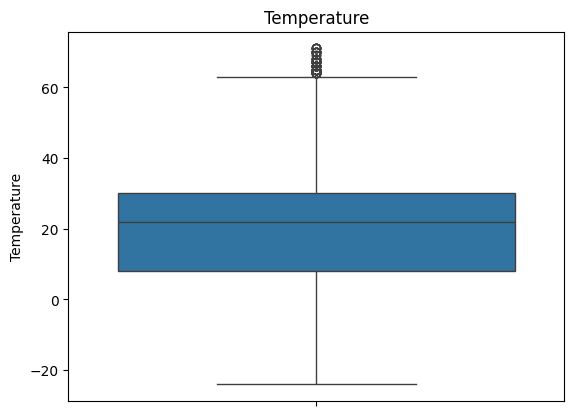

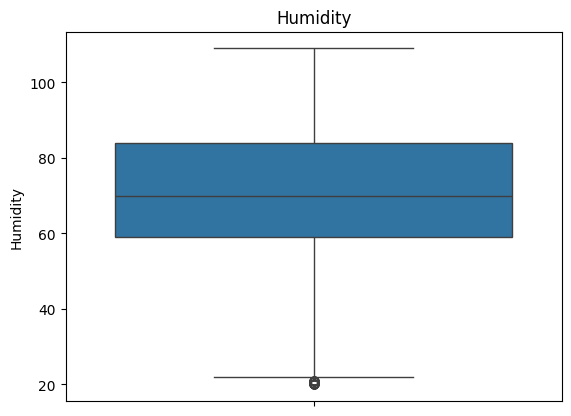

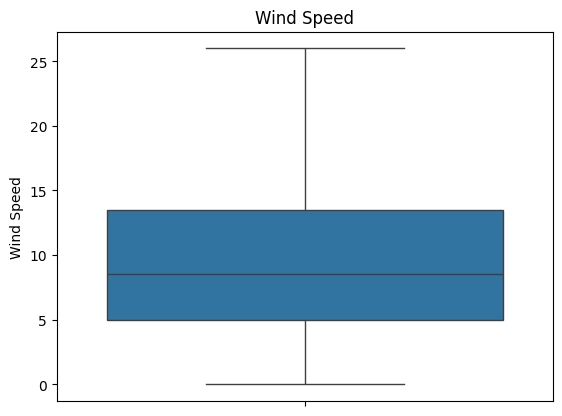

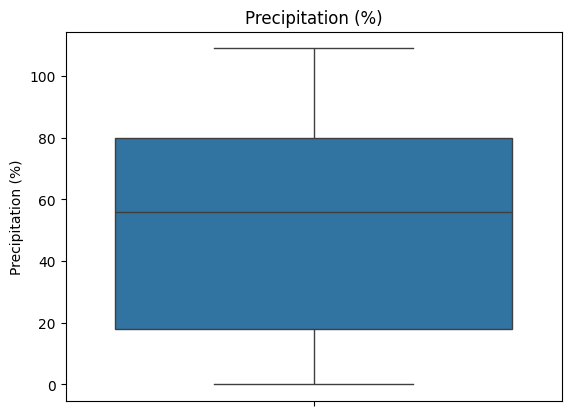

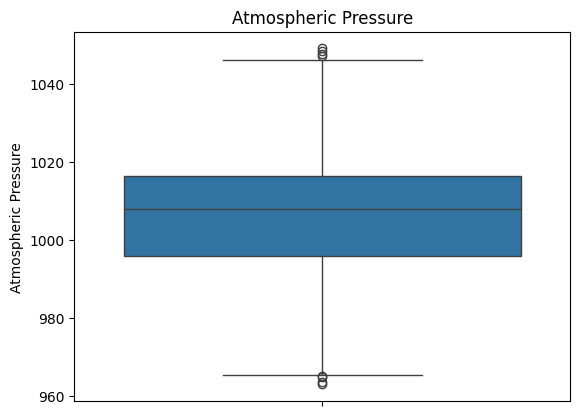

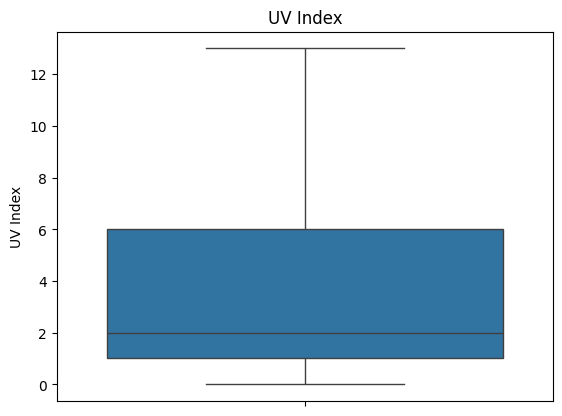

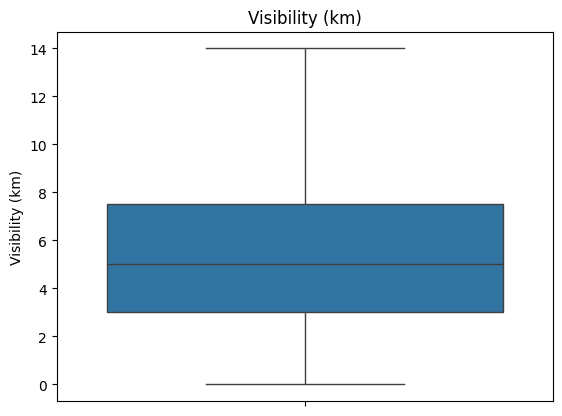

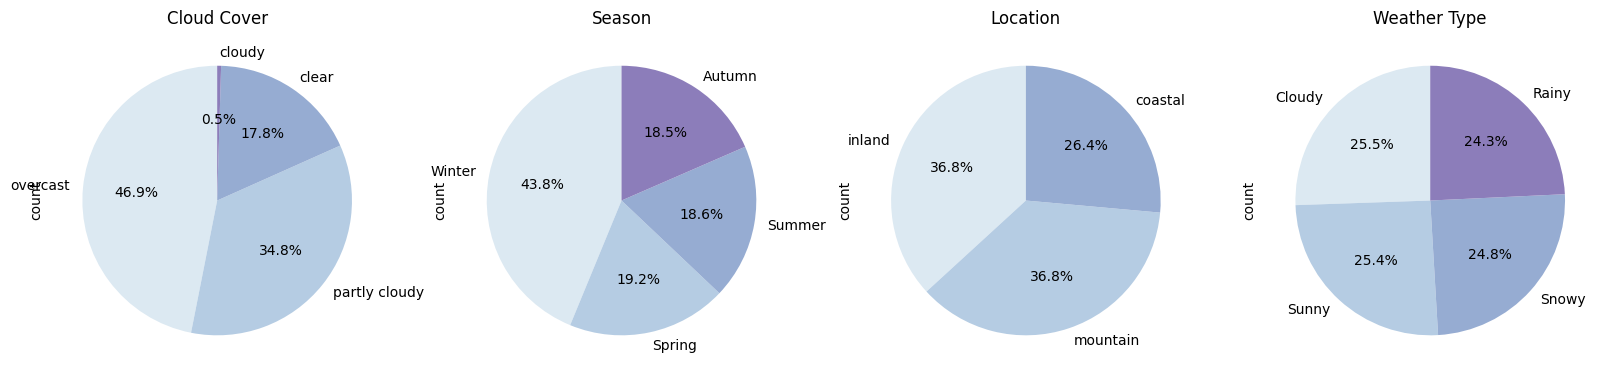

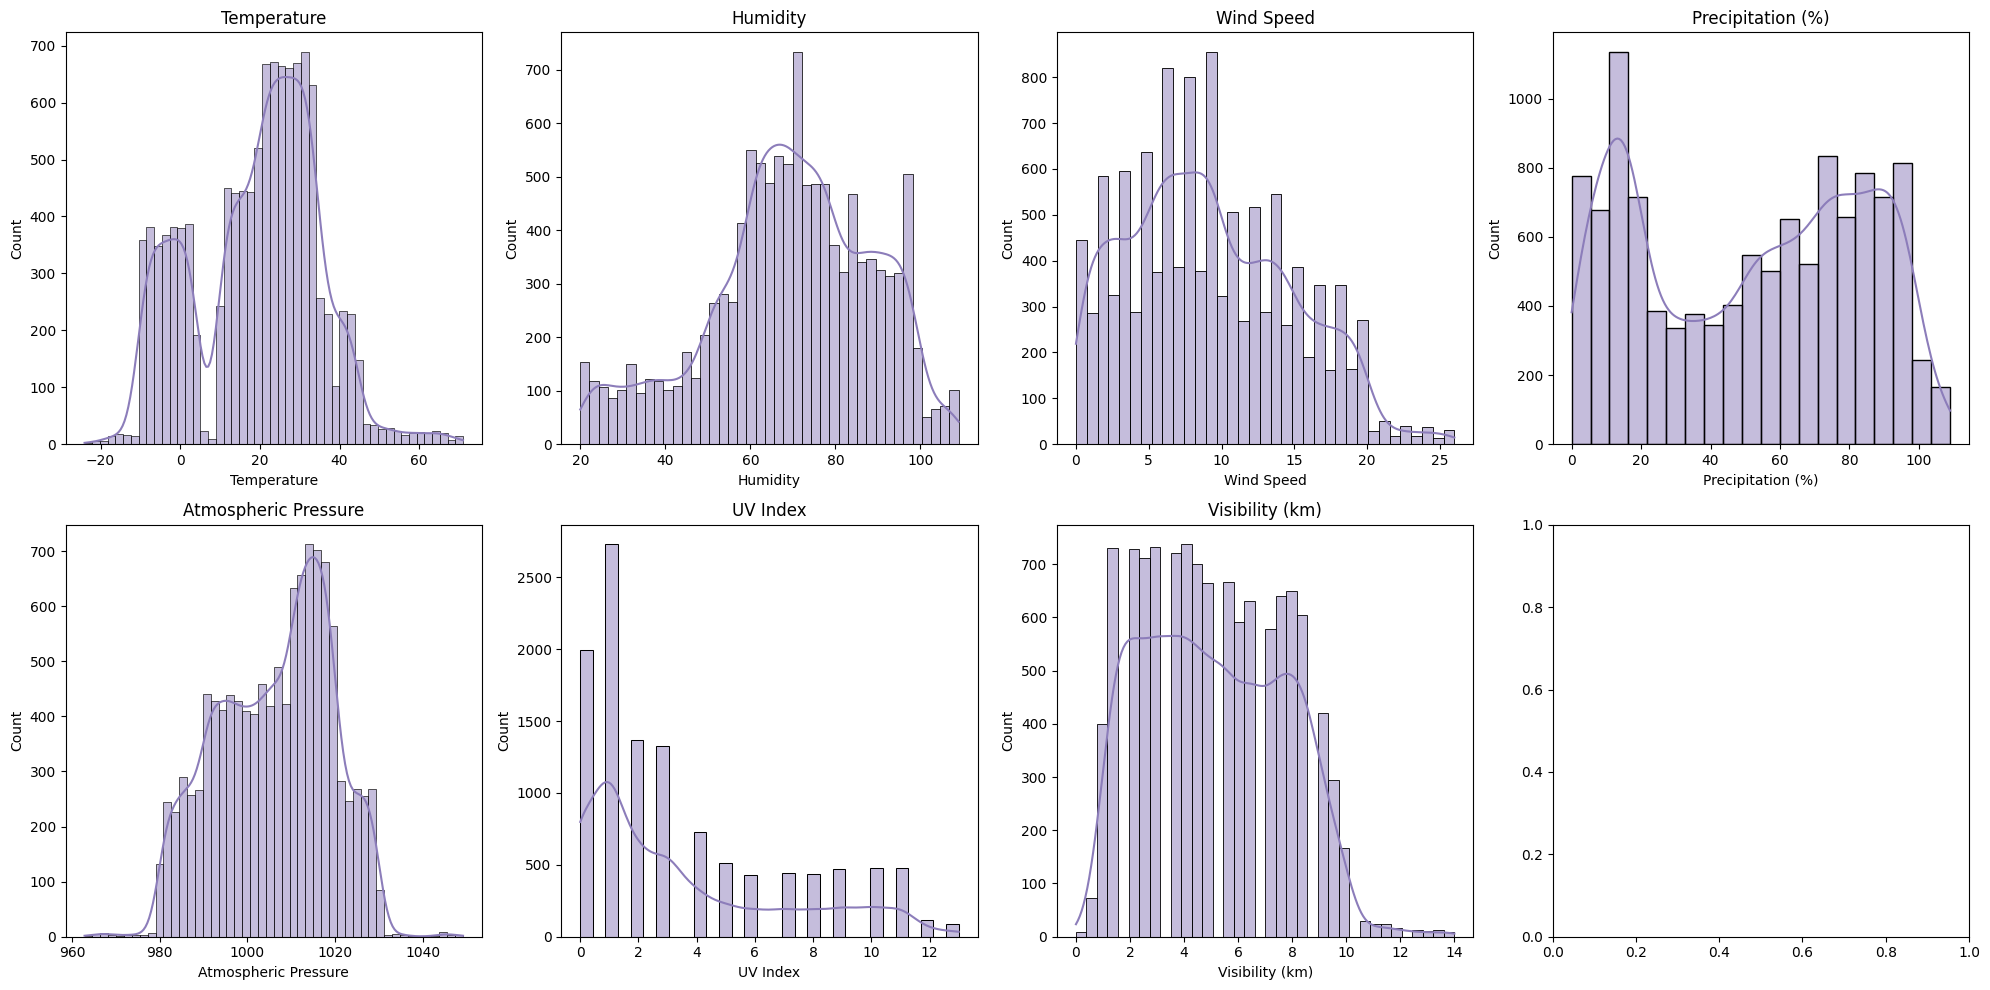

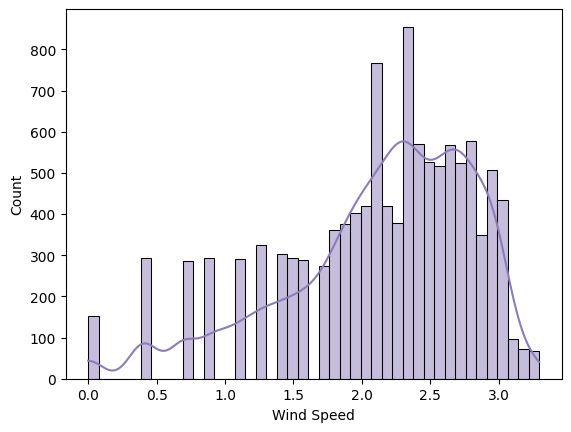

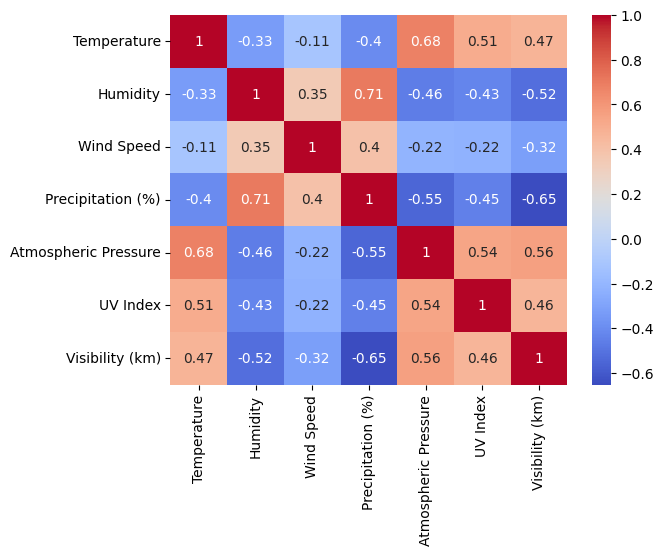

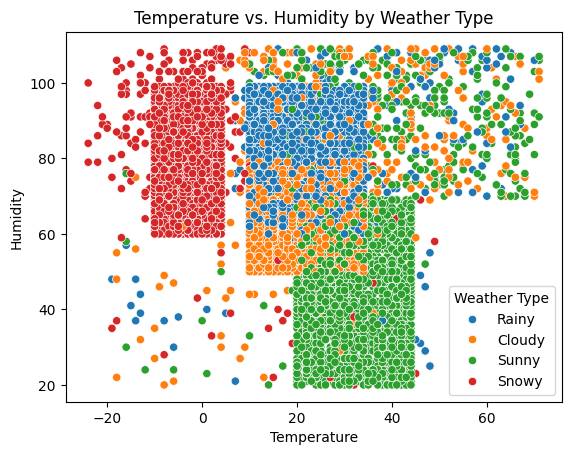

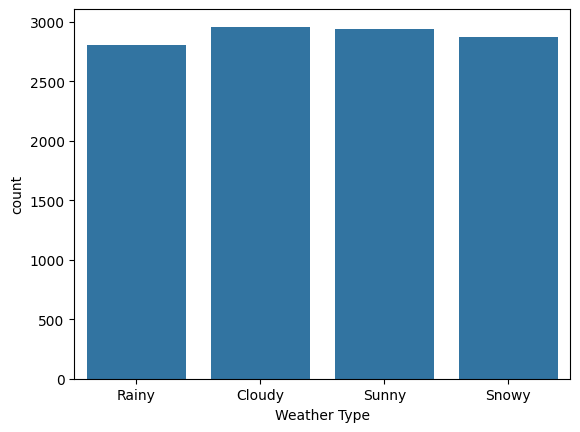


--- Logistic Regression ---


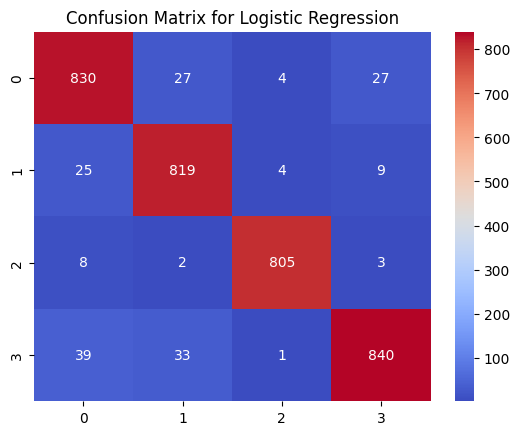

Accuracy: 0.9476
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       888
           1       0.93      0.96      0.94       857
           2       0.99      0.98      0.99       818
           3       0.96      0.92      0.94       913

    accuracy                           0.95      3476
   macro avg       0.95      0.95      0.95      3476
weighted avg       0.95      0.95      0.95      3476



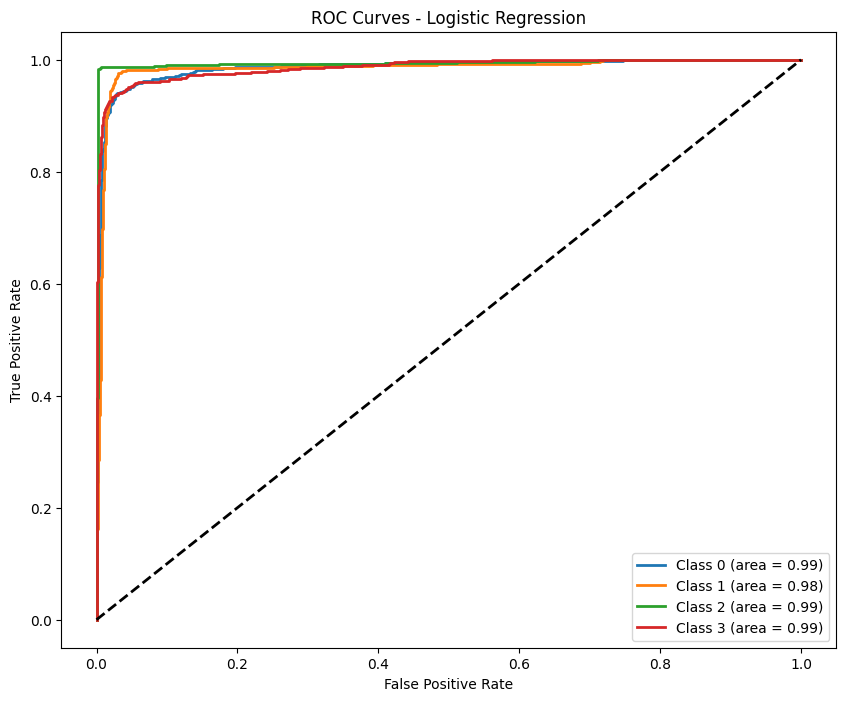


--- Naive Bayes ---


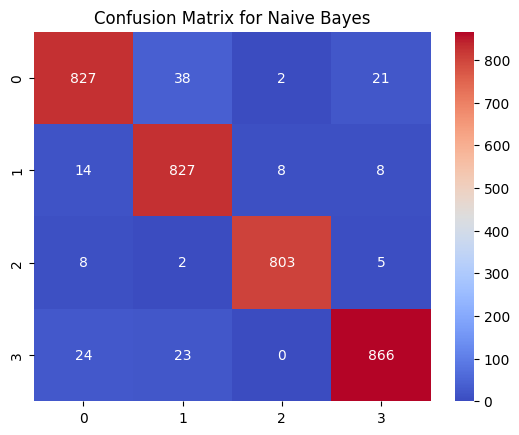

Accuracy: 0.9560
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       888
           1       0.93      0.96      0.95       857
           2       0.99      0.98      0.98       818
           3       0.96      0.95      0.96       913

    accuracy                           0.96      3476
   macro avg       0.96      0.96      0.96      3476
weighted avg       0.96      0.96      0.96      3476



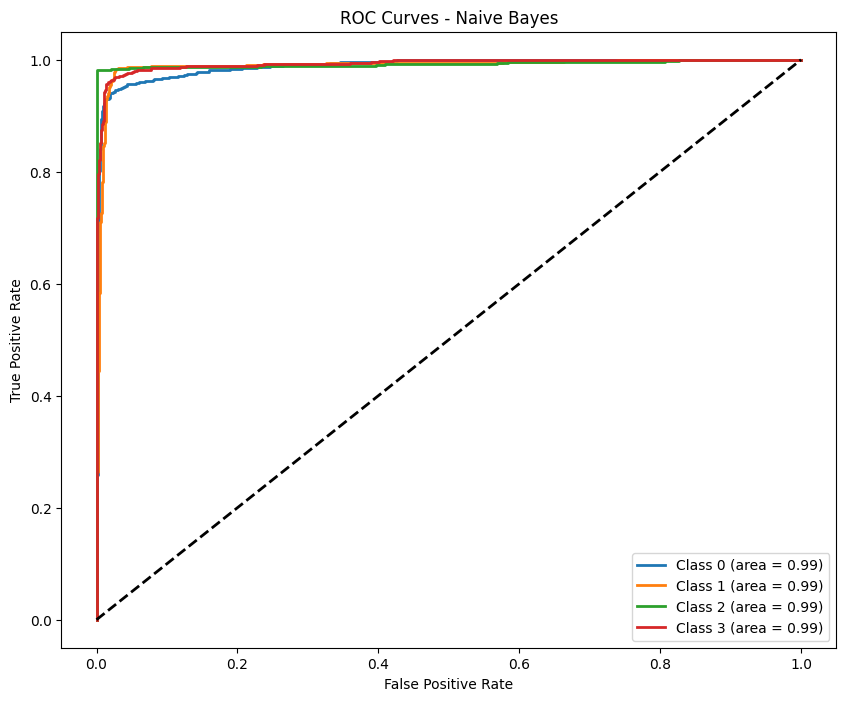


--- Random Forest ---


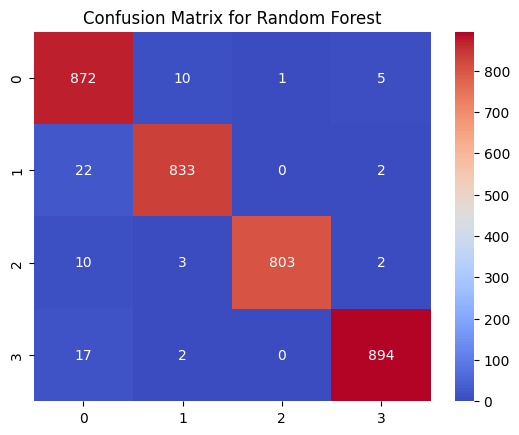

Accuracy: 0.9787
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       888
           1       0.98      0.97      0.98       857
           2       1.00      0.98      0.99       818
           3       0.99      0.98      0.98       913

    accuracy                           0.98      3476
   macro avg       0.98      0.98      0.98      3476
weighted avg       0.98      0.98      0.98      3476



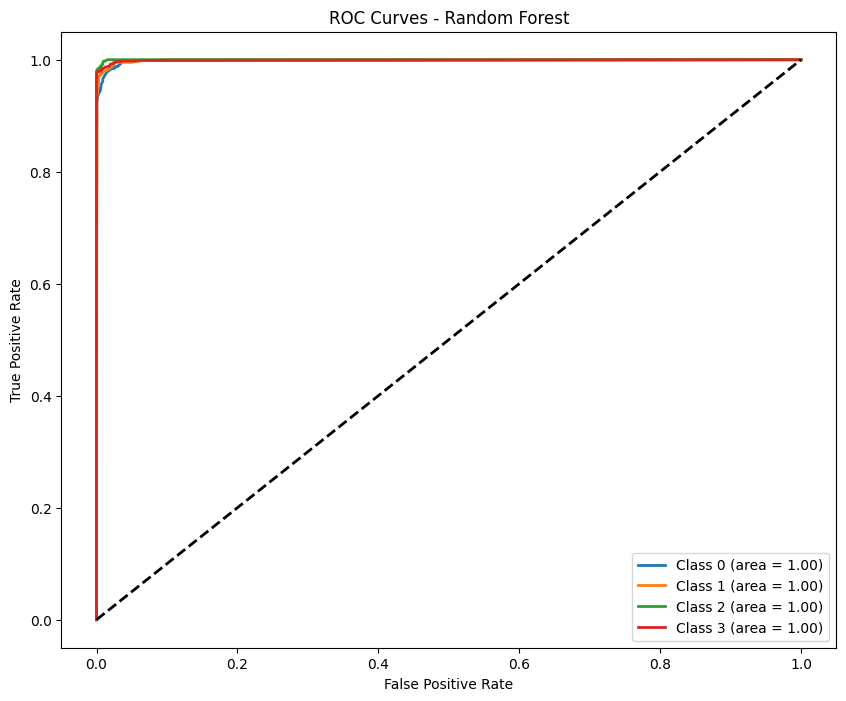

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import warnings

warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv(r"weather_classification_data.csv")

# Initial EDA (head, info, describe)
print(df.head())
print(df.info())
print(df.describe())

# Value counts of target
print(df['Weather Type'].value_counts())

# Unique values for categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col}: {df[col].unique()}')

# Boxplots for numerical columns
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

# IQR outlier removal function
def iqr_outliers(df, k=1.5):
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            upper_bound = q3 + k * iqr
            lower_bound = q1 - k * iqr
            df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

df = iqr_outliers(df)

# Temperature ranges per weather type
for weather in df['Weather Type'].unique():
    temp_min = df[df['Weather Type'] == weather]['Temperature'].min()
    temp_max = df[df['Weather Type'] == weather]['Temperature'].max()
    print(f"The {weather} weather temperature ranges from {temp_min} to {temp_max}")

print("---------------------------------------------------------------")

# Humidity ranges per weather type
for weather in df['Weather Type'].unique():
    hum_min = df[df['Weather Type'] == weather]['Humidity'].min()
    hum_max = df[df['Weather Type'] == weather]['Humidity'].max()
    print(f"The {weather} weather humidity ranges from {hum_min} to {hum_max}")

print("---------------------------------------------------------------")

# Wind Speed ranges per weather type
for weather in df['Weather Type'].unique():
    wind_min = df[df['Weather Type'] == weather]['Wind Speed'].min()
    wind_max = df[df['Weather Type'] == weather]['Wind Speed'].max()
    print(f"The {weather} weather wind speed ranges from {wind_min} to {wind_max}")

# Plot boxplots again after outlier removal
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

# Pie charts for categorical columns
df_cat = df.select_dtypes(include='object')
fig, axs = plt.subplots(1, len(df_cat.columns), figsize=(5*len(df_cat.columns), 5))
if len(df_cat.columns) == 1:
    axs = [axs]
for i, col in enumerate(df_cat.columns):
    df[col].value_counts().plot.pie(ax=axs[i], autopct='%1.1f%%', colors=sns.color_palette('BuPu'), startangle=90)
    axs[i].set_title(col)
plt.show()

# Distribution plots for numerical columns
df_num = df.select_dtypes(include=['float64', 'int64'])
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()
for i, col in enumerate(df_num.columns):
    sns.histplot(df[col], ax=axs[i], kde=True, color='#8C7DBA')
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

# Fix skewness in Wind Speed with log transform
df['Wind Speed'] = np.log1p(df['Wind Speed'])
sns.histplot(df['Wind Speed'], kde=True, color='#8C7DBA')
plt.show()

# Correlation heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Pairplot
sns.scatterplot(data=df, x='Temperature', y='Humidity', hue='Weather Type')
plt.title('Temperature vs. Humidity by Weather Type')
plt.show()

# Countplot for target
sns.countplot(x=df['Weather Type'])
plt.show()

# Label encode categorical columns
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Split data
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Binarize labels for ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

def evaluate_model(model, model_name):
    print(f"\n--- {model_name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Classification Report
    print(classification_report(y_test, y_pred))

    # ROC Curve
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {i} (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.title(f'ROC Curves - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Logistic Regression
evaluate_model(LogisticRegression(), "Logistic Regression")

# Naive Bayes
evaluate_model(GaussianNB(), "Naive Bayes")

# Random Forest
evaluate_model(RandomForestClassifier(random_state=42), "Random Forest")
